In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Polynomial Representation

#### Using List

In [4]:
coeff = [1, 0, 2, 0, 5]     # coefficients of the polynomial
n = len(coeff) - 1          # degree. Remember: number of coeff = degree + 1


# For a single value of x, finding p(x)
x = 6.0
p_x = 0.0
for i in range(n+1):
    p_x += coeff[i] * (x ** (n - i))
print(p_x)


# For multiple values of x, finding p(x) for each x in x_arr
x_arr = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
p_x_arr = []
for i in range(len(x_arr)):
    p_x = 0.0
    for j in range(n + 1):
        p_x += coeff[j]*x_arr[i]**j
    p_x_arr.append(p_x)
print(p_x_arr)

1373.0
[8.0, 89.0, 424.0, 1313.0, 3176.0, 6553.0]


#### Using Class

In [5]:
class Polynomial:
    def __init__(self, coeff):
        self.coeff = coeff
        self.degree = len(self.coeff) - 1
    
    def get_degree(self):
        return self.degree
    
    def get_coeff(self):
        return self.coeff
    
    def __call__(self, x_arr):
        p_x_arr = []
        for i in range(len(x_arr)):
            p_x = 0
            for j in range(self.degree+1):
                p_x += self.coeff[j]*x_arr[i]**j
            p_x_arr.append(p_x)
        
        return p_x_arr

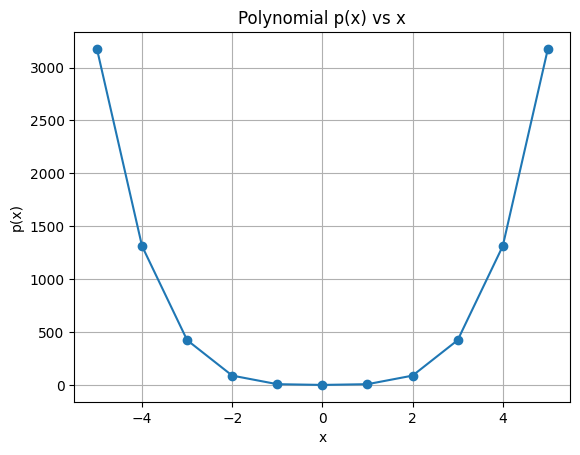

In [6]:
# Test Cases
x_arr = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])

p = Polynomial(coeff)
y_arr = p(x_arr)

plt.plot(x_arr, y_arr, marker='o')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Polynomial p(x) vs x')
plt.grid(True)
plt.show()


## Polynomial Interpolation

### Vandermonde Matrix Method

In [ ]:
def createMatrix(data_x, data_y):
    # Create Vandermonde Matrix, X
    n = len(data_x)
    X = np.zeros((n,n))
    for r in range(len(data_x)):
        for c in range(len(data_y)):
            X[r,c] = data_x[r]**c
    
    # Invert X
    X_inv = np.linalg.pinv(X)

    # Calculate coefficients, A = (X**-1)*y
    A = np.dot(X_inv, data_y)
    
    # Create Polynomial
    p_x = Polynomial(A)
    return p_x

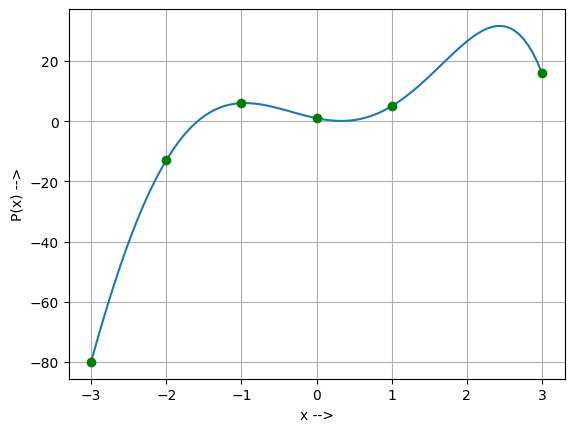

In [8]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = createMatrix(data_x, data_y)

x_arr = np.linspace(-3, 3, 100)
y_arr = p(x_arr)

plt.grid()
plt.plot(x_arr, y_arr)
plt.plot(data_x, data_y, 'go')
plt.xlabel("x -->")
plt.ylabel("P(x) -->")
plt.show()